# Market Basket Analysis with Python

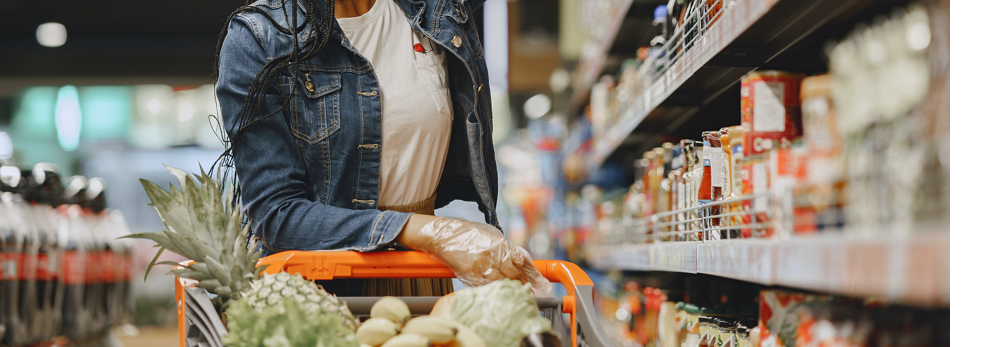

Hello, this is a project showcasing data mining with Python. In this project, we are going to find out the highly correlated products from a retail dataset, which is also known as market basket analysis. With the results, we will be able to optimize cross-selling, shelf placement, etc.

For this task, I will use [mlxtend library](http://rasbt.github.io/mlxtend/#welcome-to-mlxtends-documentation) with Apriori algorithm. Below is the agenda for the project : 

1. About Dataset
2. What Apriori Algorithm Does
3. Data Exploration
4. Market Basket Analysis
5. Summary

# 1. About Dataset

This is a [Kaggle dataset designed for basket analysis](https://www.kaggle.com/heeraldedhia/groceries-dataset). In this dataset, we have nearly 40k items purchased by customers, each item is related to a member ID (customer) and a date (purchase date). The problem here is there is no transaction id in the original data, perhaps we can combine the member ID with the purchase date, and consider it as one transaction.

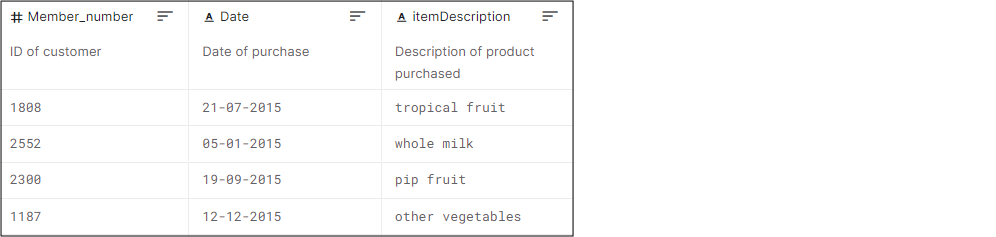

# 2. What Apriori Algorithm Does

Aprioi algorithm is a way of finding frequent itemsets from a dataset. It is based on a principle called Apriori Property :$\;\;$
**" All subsets of a frequent itemset must be frequent, if an itemset is infrequent, all its supersets will be infrequent. "**



With this principle, we can reduce the searching area, thereby performing a more efficient calculation. For example, if banana is not a frequently purchased item in the grocery, then any combination of banana (such as banana & milk) isn't frequent either. Hence, when we are finding frequent itemsets, we can skip sets with bananas to accelerate the process.

# 3. Data Exploration

### 3.1. Import libraries & dataset

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
df = pd.read_csv('Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


### 3.2. Take a look at the data

In [2]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [3]:
# Number of items : 39k
df.shape

(38765, 3)

In [4]:
# Nmuber of members : 3,898
df['Member_number'].nunique()

3898

In [5]:
# Number of transactions (here we assume "member ID + date" as one transaction) : 15k
df.groupby(['Member_number','Date']).ngroups

14963

<AxesSubplot:title={'center':'Number of Products Sold (Top 10)'}, ylabel='itemDescription'>

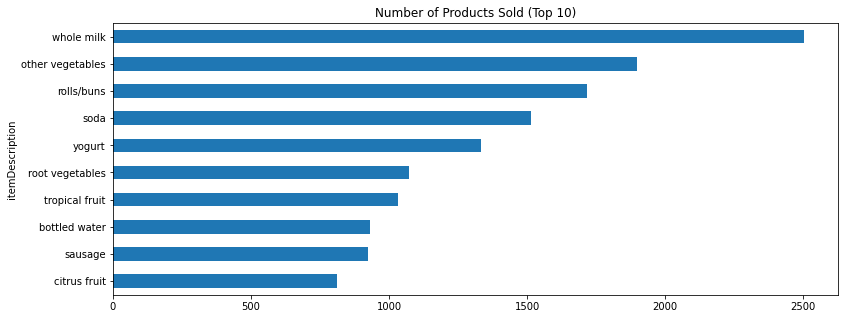

In [6]:
# Top 10 best selling products

top10 = df.groupby(['itemDescription'])['itemDescription'].count().sort_values(ascending=False).head(10)
top10.sort_values(ascending=True).plot(kind='barh', x='itemDescription', figsize=(13,5), title='Number of Products Sold (Top 10)')

In [7]:
# Create a "year_month" column to observe the sales trend over time

df['year_month'] = df['Date'].astype('datetime64').dt.to_period('M')
df.head()

,Member_number,Date,itemDescription,year_month
0,1808,21-07-2015,tropical fruit,2015-07
1,2552,05-01-2015,whole milk,2015-05
2,2300,19-09-2015,pip fruit,2015-09
3,1187,12-12-2015,other vegetables,2015-12
4,3037,01-02-2015,whole milk,2015-01


<AxesSubplot:title={'center':'Number of Products Sold Over Time'}, xlabel='year_month'>

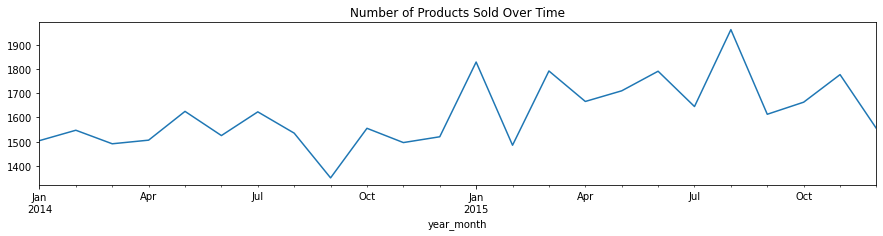

In [8]:
# Looks like the number of products sold is increasing over time

monthly_product = df.groupby(['year_month'])['itemDescription'].count()
monthly_product.plot(x='year_month', figsize=(15,3), title='Number of Products Sold Over Time')

 # 4. Market Basket Analysis

### 4.1. Preparation

In [9]:
# Create transaction ID with member ID + date

df['transaction_id'] = df['Member_number'].astype(str) + '_' + df['Date']
df.head()

,Member_number,Date,itemDescription,year_month,transaction_id
0,1808,21-07-2015,tropical fruit,2015-07,1808_21-07-2015
1,2552,05-01-2015,whole milk,2015-05,2552_05-01-2015
2,2300,19-09-2015,pip fruit,2015-09,2300_19-09-2015
3,1187,12-12-2015,other vegetables,2015-12,1187_12-12-2015
4,3037,01-02-2015,whole milk,2015-01,3037_01-02-2015


In [10]:
# One hot encoding

df_ohe = pd.crosstab(df['transaction_id'],df['itemDescription']).astype(bool)
df_ohe.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
transaction_id,,,,,,,,,,,,,,,,,,,,,
1000_15-03-2015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1000_24-06-2014,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1000_24-07-2015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000_25-11-2015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000_27-05-2015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 4.2. Find out the frequent items / itemsets

Here we need to set the parameter :$\;$**min_support**. It means the minimum acceptable occurrence frequency of a product (or itemset) in the dataset. For example, if there are a total of 1,000 transactions and the min_support is 0.01, then any product (or itemset) should at least appear in 10 transactions (1,000 * 0.01), otherwise, will not be considered as a frequent item. But, what is the appropriate number for min_support? In my opinion, it depends on two things : 


1. **Product Category** :$\;$ Let's say you are investigating high-priced products, there might be only a few transactions you can find in the whole dataset, therefore a lower min_support could be acceptable.


2. **Acceptable Size of Observations** :$\;$ As the example shows, min_support (0.01) & the number of transactions (1,000) will determine the minimum size of the observation (10). Are 10 observations large enough to explain your result?  

In [16]:
# Find out the frequent items / itemsets

frequent = apriori(df_ohe, min_support=0.002, use_colnames=True) 
frequent.sort_values('support', ascending=False)

,support,itemsets
123,0.157923,(whole milk)
78,0.122101,(other vegetables)
93,0.110005,(rolls/buns)
104,0.097106,(soda)
124,0.085879,(yogurt)
...,...,...
166,0.002005,"(butter, root vegetables)"
213,0.002005,"(domestic eggs, root vegetables)"
252,0.002005,"(newspapers, pastry)"
209,0.002005,"(rolls/buns, dessert)"


### 4.3. Find out highly positive correlated items

Here comes the indicator "**Lift**". It indicates how product C (consequent)'s sales performance is affected by product A (antecedent). When lift value > 1, it means the existence of A in the basket, increases the probability of customer buying C, the higher the value, the better A influences C. In this case,「curd & sausage」 has the highest lift value.

In [15]:
# Use the association rule to find out the "Lift" for each itemset, then sort the data by "Lift" descendingly

associate = association_rules(frequent, metric='lift', min_threshold = 1)
associate.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(curd),(sausage),0.033683,0.060349,0.002941,0.087302,1.446615,0.000908,1.029531
12,(sausage),(curd),0.060349,0.033683,0.002941,0.048726,1.446615,0.000908,1.015814
4,(brown bread),(canned beer),0.037626,0.046916,0.002406,0.063943,1.362937,0.000641,1.018191
5,(canned beer),(brown bread),0.046916,0.037626,0.002406,0.051282,1.362937,0.000641,1.014394
21,(frozen vegetables),(sausage),0.028002,0.060349,0.002072,0.073986,1.225966,0.000382,1.014726
20,(sausage),(frozen vegetables),0.060349,0.028002,0.002072,0.034330,1.225966,0.000382,1.006553
2,(sausage),(bottled beer),0.060349,0.045312,0.003342,0.055371,1.222000,0.000607,1.010649
3,(bottled beer),(sausage),0.045312,0.060349,0.003342,0.073746,1.222000,0.000607,1.014464
15,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420
14,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579


**Wait a minute!**

In the first & second row of the table, we can see the same itemset with antecedent & consequent opposite. They have the exact same lift value (1.466), so which is the better order?

Now we need to check another indicator "**Confidence**". It means the percentage of customers buying C (consequent) when they already have A (antecedent) in the basket. Confidence indicates how reliable the result is, a higher value means better reliability. In this case, 「curd」 as an antecedent, has higher confidence (0.087).

# 5. Summary

As we can see, itemset 「curd (antecedent) & sausage (consequent)」 has the highest lift value (1.446), although the confidence (0.087) isn't high, we can assume that there is some kind of positive correlation in between. Perhaps it might be a good idea to put them together on the shelf!